In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 30)

In [2]:
df = pd.read_csv('laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [4]:
df.rename(columns= lambda x:x.strip().replace(' ','_').casefold(),inplace=True)   #my must do thing to make things easy 

In [5]:
df.columns

Index(['unnamed:_0', 'company', 'typename', 'inches', 'screenresolution',
       'cpu', 'ram', 'memory', 'gpu', 'opsys', 'weight', 'price'],
      dtype='object')

In [6]:
#null count check and dtype check 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   unnamed:_0        1303 non-null   int64  
 1   company           1303 non-null   object 
 2   typename          1303 non-null   object 
 3   inches            1303 non-null   float64
 4   screenresolution  1303 non-null   object 
 5   cpu               1303 non-null   object 
 6   ram               1303 non-null   object 
 7   memory            1303 non-null   object 
 8   gpu               1303 non-null   object 
 9   opsys             1303 non-null   object 
 10  weight            1303 non-null   object 
 11  price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [7]:
# no null values in the data 
#we will check how things are

In [9]:
df.isnull().sum()

unnamed:_0          0
company             0
typename            0
inches              0
screenresolution    0
cpu                 0
ram                 0
memory              0
gpu                 0
opsys               0
weight              0
price               0
dtype: int64

In [12]:
df.drop(columns=['unnamed:_0'],inplace=True)

In [13]:
df.ram.value_counts()

8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: ram, dtype: int64

In [14]:
df.weight.value_counts()

2.2kg     121
2.1kg      58
2.4kg      44
2.3kg      41
2.5kg      38
         ... 
3.25kg      1
4.7kg       1
1.55kg      1
1.18kg      1
4.0kg       1
Name: weight, Length: 179, dtype: int64

In [15]:
#ram and weights are in string format,like 8GB 2Kg.. we will make it integer 

df['ram'] = df['ram'].str.replace('GB','')
df['weight'] = df['weight'].str.replace('kg','')

In [16]:
df['ram'] = df['ram'].astype('int32')
df['weight'] = df['weight'].astype('float32')

In [21]:
df.weight.describe()

count    1303.000000
mean        2.038733
std         0.665475
min         0.690000
25%         1.500000
50%         2.040000
75%         2.300000
max         4.700000
Name: weight, dtype: float64

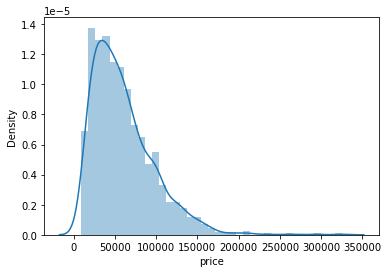

In [27]:
#lets see our target variable
sns.distplot(df.price);

In [28]:
# fairly normal 

In [29]:
df['screenresolution'].value_counts()

Full HD 1920x1080                            507
1366x768                                     281
IPS Panel Full HD 1920x1080                  230
IPS Panel Full HD / Touchscreen 1920x1080     53
Full HD / Touchscreen 1920x1080               47
                                            ... 
IPS Panel Full HD 1366x768                     1
Touchscreen / Full HD 1920x1080                1
Touchscreen / Quad HD+ 3200x1800               1
Touchscreen / 4K Ultra HD 3840x2160            1
IPS Panel Touchscreen 2400x1600                1
Name: screenresolution, Length: 40, dtype: int64

In [30]:
#feature engineering 
#making the new column indicating whether it is touch screen or not 

In [31]:
df['touchscreen'] = df['screenresolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [33]:
df.touchscreen.head()

0    0
1    0
2    0
3    0
4    0
Name: touchscreen, dtype: int64

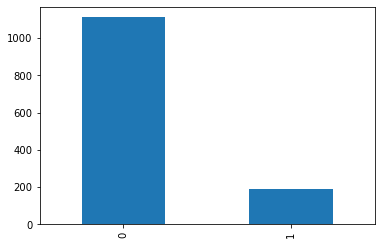

In [35]:
df['touchscreen'].value_counts().plot(kind='bar');

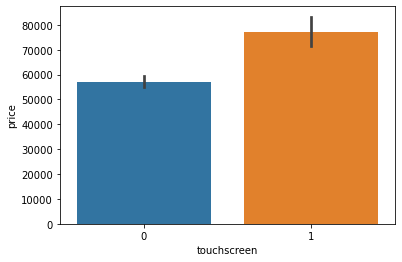

In [37]:
#lets see it's effect on price

sns.barplot(x=df['touchscreen'],y=df['price']);

In [38]:
# lets see if the screen type being IPS affects the price 

df['ips'] = df['screenresolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [39]:
df.ips.head()

0    1
1    0
2    0
3    1
4    1
Name: ips, dtype: int64

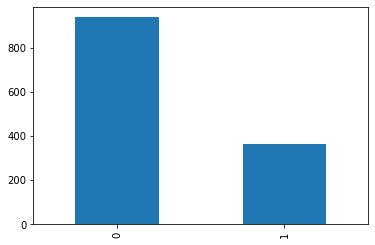

In [41]:
df['ips'].value_counts().plot(kind='bar');

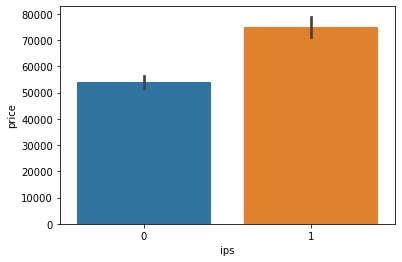

In [43]:
sns.barplot(x=df['ips'],y=df['price']);

In [44]:
# this also confirms our understanding 

In [45]:
new = df['screenresolution'].str.split('x',n=1,expand=True)

In [46]:
df['x_res'] = new[0]
df['y_res'] = new[1]

In [47]:
df.sample(5)

,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,touchscreen,ips,x_res,y_res
755,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i5 6260U 1.8GHz,8,256GB SSD,Intel HD Graphics 540,Windows 10,1.30,63882.72,1,1,IPS Panel Quad HD+ / Touchscreen 3200,1800
1036,HP,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,2.04,39533.76,0,0,1366,768
535,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,1.93,72940.32,0,0,Full HD 1920,1080
155,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,6,256GB SSD,AMD Radeon 520,Windows 10,1.91,32980.32,0,0,Full HD 1920,1080
828,Acer,Netbook,11.6,IPS Panel 1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.35,18914.40,0,1,IPS Panel 1366,768


In [48]:
df['x_res'] = df['x_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [49]:
df.head()

,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,touchscreen,ips,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [50]:
#cool done
#now converting them into correct datatype 
df['x_res'] = df['x_res'].astype('int')
df['y_res'] = df['y_res'].astype('int')

In [51]:
df.corr()['price']

inches         0.068197
ram            0.743007
weight         0.210370
price          1.000000
touchscreen    0.191226
ips            0.252208
x_res          0.556529
y_res          0.552809
Name: price, dtype: float64

In [52]:
#from x_res and y_res lets make a new column ppi (pixel per inches) which describes the quality of the display 

df['ppi'] = (((df['x_res']**2) + (df['y_res']**2))**0.5/df['inches']).astype('float')

In [53]:
#now we have extracted almost all the information from screenresolution column, so let's drop it

df.drop(columns=['screenresolution'],inplace=True)

In [54]:
#also lets drop the columns which we used to create ppi, as it will induce multicollinearity 

df.drop(columns=['inches','x_res','y_res'],inplace=True)

In [55]:
df.columns

Index(['company', 'typename', 'cpu', 'ram', 'memory', 'gpu', 'opsys', 'weight',
       'price', 'touchscreen', 'ips', 'ppi'],
      dtype='object')

In [56]:
#let's try to extract something out of cpu column 

In [57]:
df['cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: cpu, Length: 118, dtype: int64

In [58]:
df['cpu_name'] = df['cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [59]:
df.head()

,company,typename,cpu,ram,memory,gpu,opsys,weight,price,touchscreen,ips,ppi,cpu_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [60]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [61]:
df['cpu_brand'] = df['cpu_name'].apply(fetch_processor)

In [62]:
df.head()

,company,typename,cpu,ram,memory,gpu,opsys,weight,price,touchscreen,ips,ppi,cpu_name,cpu_brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


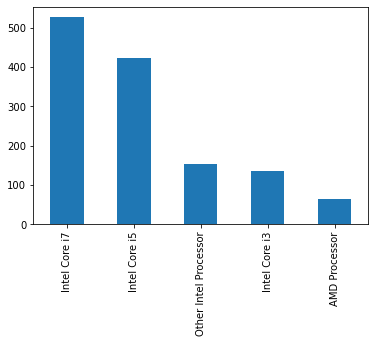

In [64]:
df['cpu_brand'].value_counts().plot(kind='bar');

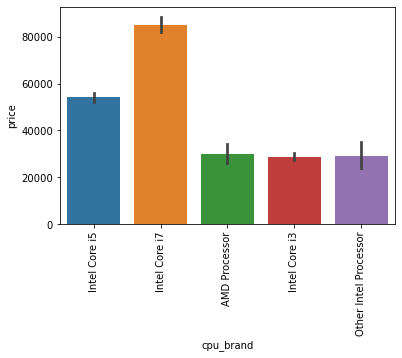

In [65]:
sns.barplot(x=df['cpu_brand'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

In [66]:
#hmm everything makes sense

In [67]:
#lets drop the redundant 
df.drop(columns=['cpu','cpu_name'],inplace=True)

In [68]:
df.columns

Index(['company', 'typename', 'ram', 'memory', 'gpu', 'opsys', 'weight',
       'price', 'touchscreen', 'ips', 'ppi', 'cpu_brand'],
      dtype='object')

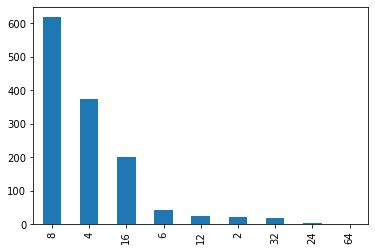

In [70]:
#lets look at ram column
df['ram'].value_counts().plot(kind='bar');

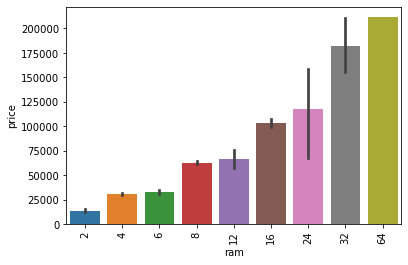

In [71]:
sns.barplot(x=df['ram'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

In [74]:
#yya cool
#moving on to memory 

In [73]:
df['memory'].value_counts()

256GB SSD                    412
1TB HDD                      223
500GB HDD                    132
512GB SSD                    118
128GB SSD +  1TB HDD          94
                            ... 
8GB SSD                        1
508GB Hybrid                   1
1.0TB HDD                      1
512GB SSD +  1.0TB Hybrid      1
256GB SSD +  1.0TB Hybrid      1
Name: memory, Length: 39, dtype: int64

In [75]:
df['memory'] = df['memory'].astype(str).replace('\.0', '', regex=True)
df["memory"] = df["memory"].str.replace('GB', '')
df["memory"] = df["memory"].str.replace('TB', '000')
new = df["memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["layer1flash_storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["layer2flash_storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["layer1HDD"]+df["second"]*df["layer2HDD"])
df["SSD"]=(df["first"]*df["layer1SSD"]+df["second"]*df["layer2SSD"])
df["Hybrid"]=(df["first"]*df["layer1Hybrid"]+df["second"]*df["layer2Hybrid"])
df["flash_storage"]=(df["first"]*df["layer1flash_storage"]+df["second"]*df["layer2flash_storage"])

df.drop(columns=['first', 'second', 'layer1HDD', 'layer1SSD', 'layer1Hybrid',
       'layer1flash_storage', 'layer2HDD', 'layer2SSD', 'layer2Hybrid',
       'layer2flash_storage'],inplace=True)

In [76]:
df.sample(5)

,company,typename,ram,memory,gpu,opsys,weight,price,touchscreen,ips,ppi,cpu_brand,HDD,SSD,Hybrid,flash_storage
1053,HP,Notebook,4,256 SSD,Intel HD Graphics 620,Windows 10,2.04,52161.12,0,0,100.454670,Intel Core i5,0,256,0,0
1217,Lenovo,Notebook,8,1000 HDD,Intel HD Graphics 620,No OS,2.80,28717.92,0,0,106.113062,Intel Core i5,1000,0,0,0
202,Acer,Notebook,8,1000 HDD,Nvidia GeForce 940MX,Windows 10,2.23,39533.76,0,0,141.211998,Intel Core i7,1000,0,0,0
600,HP,Notebook,8,256 SSD,Intel HD Graphics 620,Windows 10,1.84,64948.32,0,0,141.211998,Intel Core i7,0,256,0,0
854,Asus,Notebook,8,256 SSD,Nvidia GeForce GTX 930MX,Windows 10,2.30,41931.36,0,1,141.211998,Intel Core i7,0,256,0,0


In [77]:
df.drop(columns=['memory'],inplace=True)

In [78]:
df.corr()['price']

ram              0.743007
weight           0.210370
price            1.000000
touchscreen      0.191226
ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
flash_storage   -0.040511
Name: price, dtype: float64

In [79]:
#looks like hybrid and flash storage does not have much of an correlation with price 
#lets drop them to make model simpler

In [80]:
df.drop(columns=['Hybrid','flash_storage'],inplace=True)

In [81]:
df.head()

,company,typename,ram,gpu,opsys,weight,price,touchscreen,ips,ppi,cpu_brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [82]:
#okkay lets move on to the next variable GPU
df['gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: gpu, Length: 110, dtype: int64

In [83]:
df['gpu_brand'] = df['gpu'].apply(lambda x:x.split()[0])

In [84]:
df.head()

,company,typename,ram,gpu,opsys,weight,price,touchscreen,ips,ppi,cpu_brand,HDD,SSD,gpu_brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [85]:
df['gpu_brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: gpu_brand, dtype: int64

In [86]:
#just 1 entry of ARM, lets drop it 
df = df[df['gpu_brand'] != 'ARM']

In [87]:
df['gpu_brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: gpu_brand, dtype: int64

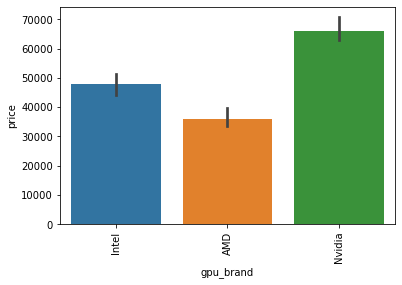

In [88]:
sns.barplot(x=df['gpu_brand'],y=df['price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [89]:
df.drop(columns=['gpu'],inplace=True)

In [90]:
#moving on 
df['opsys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: opsys, dtype: int64

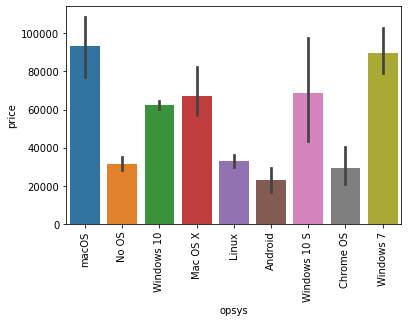

In [91]:
sns.barplot(x=df['opsys'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

In [92]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [93]:
df['os'] = df['opsys'].apply(cat_os)

In [94]:
df.head()

,company,typename,ram,opsys,weight,price,touchscreen,ips,ppi,cpu_brand,HDD,SSD,gpu_brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [95]:
df.drop(columns=['opsys'],inplace=True)

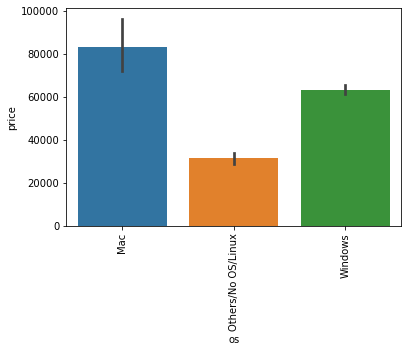

In [96]:
sns.barplot(x=df['os'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

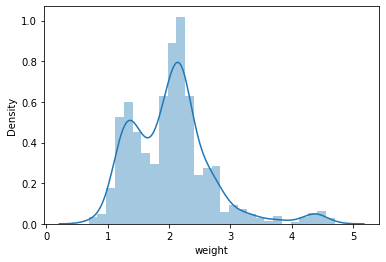

In [98]:
#done
#now let's see about weight 
sns.distplot(df['weight']);

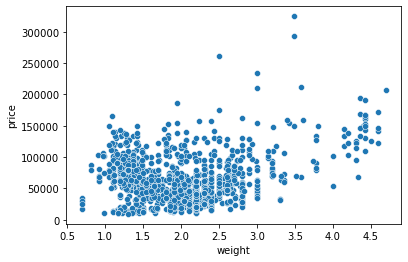

In [100]:
sns.scatterplot(x=df['weight'],y=df['price']);

In [101]:
df.corr()['price']

ram            0.742905
weight         0.209867
price          1.000000
touchscreen    0.192917
ips            0.253320
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: price, dtype: float64

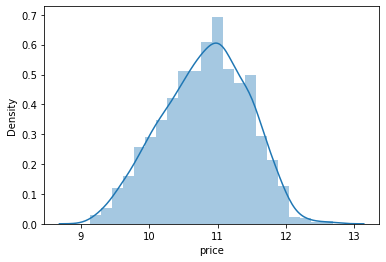

In [103]:
#now as we know, our target variable is little skewed, so let's try to make it normally distributed,
#we will try good old log transform 
sns.distplot(np.log(df['price']));

In [104]:
#cool it worked let's make new dataframe 
X = df.drop(columns=['price'])
y = np.log(df['price'])

In [106]:
y.head()

0    11.175755
1    10.776777
2    10.329931
3    11.814476
4    11.473101
Name: price, dtype: float64

## model building 

In [107]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [108]:
X_train

,company,typename,ram,weight,touchscreen,ips,ppi,cpu_brand,HDD,SSD,gpu_brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


In [109]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [111]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

### Linear regression

In [112]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.807327744841852
MAE 0.21017827976429213


### Ridge Regression

In [113]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8127331031311811
MAE 0.20926802242582954


### Lasso Regression

In [114]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8071853945317105
MAE 0.21114361613472565


### KNN

In [115]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8021984604448553
MAE 0.19319716721521116


### Decision Tree

In [116]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.838409814180793
MAE 0.1826083027477148


### SVM

In [117]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8083180902257614
MAE 0.20239059427481307


### Random Forest

In [118]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8873402378382488
MAE 0.15860130110457718


### ExtraTrees

In [120]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,bootstrap=True,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8850720167552375
MAE 0.16154538000217084


### AdaBoost

In [121]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7970552368520953
MAE 0.22774464818933704


### Gradient Boost

In [122]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8828429780698391
MAE 0.15908648922112112


### XgBoost

In [123]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8811773435850243
MAE 0.16496203512600974


### Voting Regressor

In [125]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,bootstrap=True,max_samples=0.5,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8898264481898714
MAE 0.15841244811476274


### Stacking

In [126]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8796542931806413
MAE 0.16742518672498857


In [127]:
#looks like random forest alone performes best, not lets run that cell again to make sure that latest is random forest, 
#in fact let's just make it again 

In [128]:
#rf for making it latest pipe object 
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8873402378382488
MAE 0.15860130110457718


In [129]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))